## Does time of day affect arrest rate?

#### Calculating the hourly arrest rate
When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the ri DataFrame. Then, you'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

0 = midnight
12 = noon
23 = 11 PM

In [1]:
import pandas as pd

ri = pd.read_csv("police.TXT")

ri["stop_datetime"] = ri.stop_date.str.cat(ri.stop_time, sep = ' ')
ri.stop_datetime = pd.to_datetime(ri.stop_datetime)
ri = ri.set_index("stop_datetime")
ri

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-23 01:02:00,RI,2015-02-23,01:02,NaN,F,White,Seatbelt Violation,Seat belt,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-02-23 08:37:00,RI,2015-02-23,08:37,NaN,F,Hispanic,Seatbelt Violation,Seat belt,True,Probable Cause,Citation,False,30+ Min,False,Zone X4
2015-02-23 10:09:00,RI,2015-02-23,10:09,NaN,F,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,Zone X3


In [10]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean(),"\n") 

print(ri["is_arrested"].value_counts(),"\n") ##boolean olunca trueların sayısını toplam sayıya bölüyor. =2876/(2876+76699)
        
# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour)["is_arrested"].mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour)["is_arrested"].mean()

0.036142004398366324 

is_arrested
False    76699
True      2876
Name: count, dtype: int64 

stop_datetime
0     0.052834
1     0.066955
2     0.061936
3     0.065126
4     0.042194
5     0.039106
6      0.01402
7     0.013586
8     0.022145
9     0.026347
10    0.028169
11    0.030499
12    0.037141
13    0.031205
14    0.031739
15    0.031688
16    0.035703
17    0.040266
18    0.038384
19    0.031332
20    0.035814
21     0.06428
22    0.049483
23     0.04891
Name: is_arrested, dtype: object


#### Plotting the hourly arrest rate
In this exercise, you'll create a line plot from the hourly_arrest_rate object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

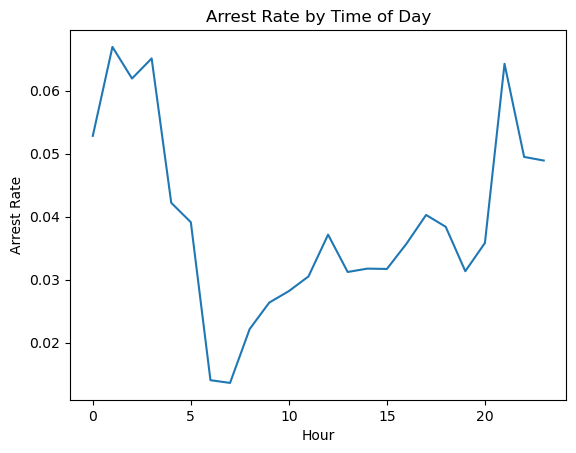

In [11]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")

# Display the plot
plt.show()

Wow! The arrest rate has a significant spike overnight, and then dips in the early morning hours.

## Are drug-related stops on the rise?
#### Plotting drug-related stops
In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column drugs_related_stop indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

In [5]:
ri = ri.reset_index("stop_datetime")
drugs_related_stop_datetime = pd.concat([ri.stop_datetime, ri.drugs_related_stop], axis = "columns")
drugs_related_stop_datetime

,stop_datetime,drugs_related_stop
0,2005-01-04 12:55:00,False
1,2005-01-23 23:15:00,False
2,2005-02-17 04:15:00,False
3,2005-02-20 17:15:00,False
4,2005-02-24 01:20:00,False
...,...,...
84490,2015-02-23 01:02:00,False
84491,2015-02-23 08:37:00,False
84492,2015-02-23 10:09:00,False
84493,2015-02-23 12:35:00,False


stop_datetime
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.014744
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


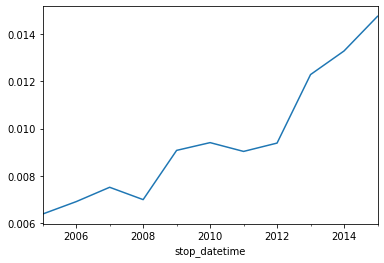

In [6]:
ri = ri.set_index("stop_datetime")

# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

Interesting! The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

#### Comparing drug and search rates
As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

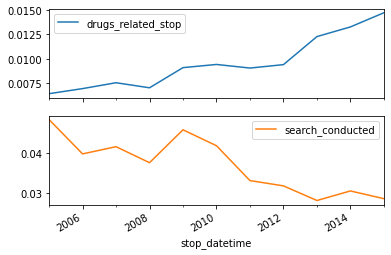

In [7]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis= "columns")

# Create subplots from 'annual'
annual.plot(subplots = True)

# Display the subplots
plt.show()

Wow! The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

## What violations are caught in each district?
#### Tallying violations by district
The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.

In [8]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation), "\n\n")

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Z                  0                 0      0                    0          0   
Zone K1          673              1254    290                  120          0   
Zone K2         1805              2719    866                  660        364   
Zone K3         2012              2649    664                  577        443   
Zone X1          249               586    113                   27         63   
Zone X3         1726              2799    713                  559        552   
Zone X4         3262              5015   1447                 1258        638   

violation  Speeding  
district             
Z                 1  
Zone K1        5960  
Zone K2        9614  
Zone K3       11573  
Zone X1        1018  
Zone X3        8183  
Zone X4        9123   


violation  Equipment  Moving violation  Other  Registration/plates  S

Great job! Next you'll plot the violations so that you can compare these districts.

#### Plotting violations by district
Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a bar plot, which is an appropriate plot type since you're comparing categorical data. Then you'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?

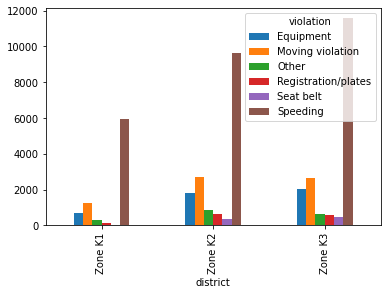

In [9]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind = "bar")

# Display the plot
plt.show()

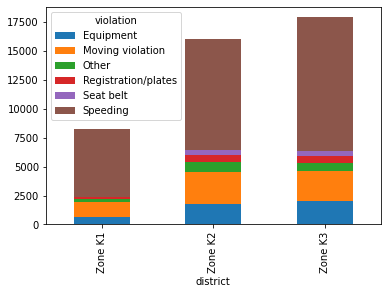

In [10]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind = "bar", stacked = True)

# Display the plot
plt.show()

Interesting! The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

## How long might you be stopped for a violation?
#### Converting stop durations to numbers
In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

Convert '0-15 Min' to 8
Convert '16-30 Min' to 23
Convert '30+ Min' to 45

In [11]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min' : 23, '30+ Min' : 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


Excellent! Next you'll analyze the stop length for each type of violation.

#### Plotting stop length
If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, you'll use violation_raw since it contains more detailed descriptions of the violations.

In [12]:
ri.stop_minutes

stop_datetime
2005-01-04 12:55:00     8.0
2005-01-23 23:15:00     8.0
2005-02-17 04:15:00     8.0
2005-02-20 17:15:00    23.0
2005-02-24 01:20:00     8.0
                       ... 
2015-02-23 01:02:00     8.0
2015-02-23 08:37:00    45.0
2015-02-23 10:09:00     8.0
2015-02-23 12:35:00    45.0
2015-02-23 12:56:00     8.0
Name: stop_minutes, Length: 84495, dtype: float64

violation_raw
APB                                 18.512195
Call for Service                    23.325661
Equipment/Inspection Violation      11.693739
Motorist Assist/Courtesy            18.402235
Other Traffic Violation             14.040274
Registration Violation              14.340831
Seatbelt Violation                   9.866019
Special Detail/Directed Patrol      14.837748
Speeding                            10.636656
Suspicious Person                   14.481481
Violation of City/Town Ordinance    13.318182
Warrant                             27.384615
Name: stop_minutes, dtype: float64


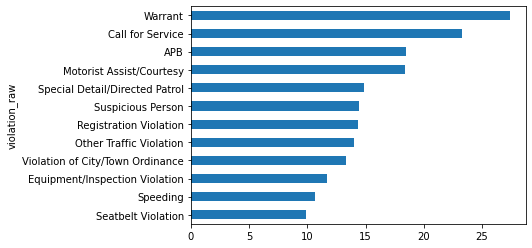

In [13]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby("violation_raw").stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby("violation_raw").stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind = "barh")

# Display the plot
plt.show()

Congratulations! You've completed the chapter on visual exploratory data analysis!